# Prédiction de loyers
On souhaite estimer le prix des loyers à partir des données surface et arrondissement. Le prix est une valeur continue donc on utilise uniquement des alorithmes de régression:

* Régression linéaire avec 1 feature (surface)
* Régression linéaire avec 2 features (surface + arrondissement)
* Régression polynomiale avec 2 features
* Régression avec k-nearest neighbors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Chargement des données

In [2]:
house_data_source = pd.read_csv('house_data.csv')
print(house_data_source.shape)
house_data_source.head()

(827, 3)


,price,surface,arrondissement
0,1820,46.1,1.0
1,1750,41.0,1.0
2,1900,55.0,1.0
3,1950,46.0,1.0
4,1950,49.0,1.0


## Nettoyage des données
Les lignes avec des valeurs manquantes ne sont pas prises en compte

In [3]:
house_data = house_data_source.dropna(axis=0, how='any')
print(house_data.shape)

(822, 3)


## Premières observations des données

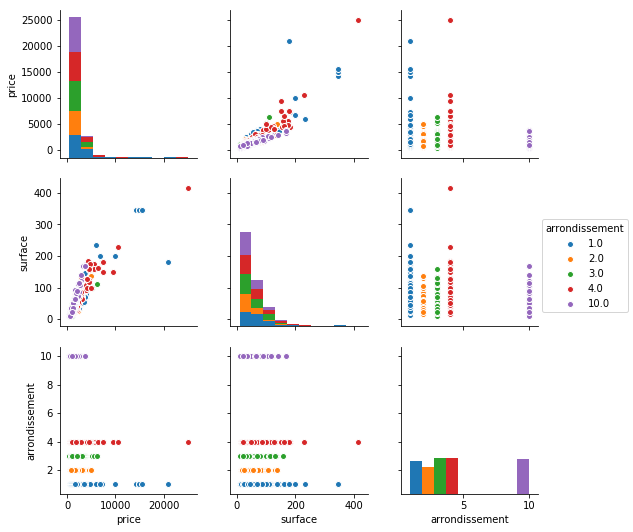

In [4]:
sns.pairplot(data=house_data, hue="arrondissement");

## Séparation training/testing set

On utilise la fonction fournie par sklearn.

In [23]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# pour les features, on prend surface et l'arrondissement (tout sauf le prix)
data = house_data.drop('price', axis=1)
# la variable à prédire est le prix
target = house_data['price']

xtrain_source, xtest_source, ytrain_source, ytest_source = train_test_split(data, target, test_size=0.2)
[print(x.shape) for x in [xtrain_source, xtest_source, ytrain_source, ytest_source]]

error = {}
pass

(657, 2)
(165, 2)
(657,)
(165,)


# Régression linéaire avec une seule feature

Il s'agit du même modèle qu'initialement proposé dans l'exercice. Il est repris à titre de comparaison uniquement.

In [6]:
# on limite à une seule feature
xtrain = xtrain_source.copy().drop('arrondissement', axis=1)
xtest = xtest_source.copy().drop('arrondissement', axis=1)
ytrain = ytrain_source.copy()
ytest = ytest_source.copy()

## Calcul de la régression

In [7]:
regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Taux d'erreur

In [8]:
error['Linear Regression w/ 1 feature'] = 1 - regr.score(xtest, ytest)
print('Erreur: %f' % error['Linear Regression w/ 1 feature'])

Erreur: 0.180109


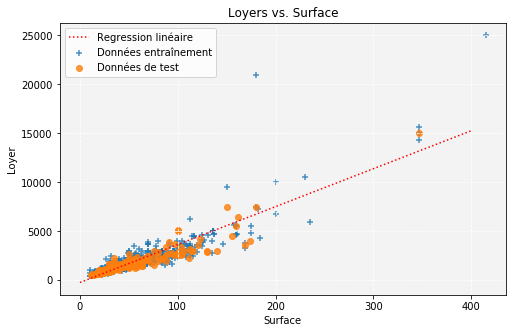

In [9]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes(facecolor='#f3f3f3')

plt.grid(color='w', linestyle='dashed')
plt.scatter(xtrain['surface'], ytrain, alpha = .8, marker = '+', label='Données entraînement')
plt.scatter(xtest['surface'], ytest, alpha = .8, marker = 'o', label='Données de test')
plt.plot([0,400], regr.predict([[0],[400]]), color='red', linestyle='dotted', label='Regression linéaire')

plt.title("Loyers vs. Surface")
plt.legend(loc='best')

ax = ax.set(xlabel='Surface', ylabel='Loyer')

# Amélioration 1 : Régression linéaire avec deux features

On utilise cette fois les deux features surface et arrondissement

In [10]:
xtrain = xtrain_source.copy()
xtest = xtest_source.copy()
ytrain = ytrain_source.copy()
ytest = ytest_source.copy()

## Calcul de la régression

In [11]:
regr_2_features = linear_model.LinearRegression()
regr_2_features.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Taux d'erreur

In [12]:
error['Linear Regression w/ 2 features'] = 1 - regr_2_features.score(xtest, ytest)
print('Erreur: %f' % error['Linear Regression w/ 2 features'])

Erreur: 0.173871


Il est meilleur qu'avec une seule feature

# Amélioration 2 : Régression polynomiale avec deux features

On utilise toujours les deux features. On essaie de faire correspondre un polynôme de degré > 1 aux données. Le degré du polynôme utilisé pour la régression est un hyperparamètre

In [13]:
# on recrée une copie de la dataframe à chaque fois
xtrain = xtrain_source.copy()
xtest = xtest_source.copy()
ytrain = ytrain_source.copy()
ytest = ytest_source.copy()

## Calcul de la régression
On effectue un premier test de régression avec un degré 2 pour valider le modèle

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', linear_model.LinearRegression(fit_intercept=False))])
model.fit(xtrain, ytrain)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False))])

# Taux d'erreur

In [15]:
error['Polynomial Regression degree 2 w/ 2 features'] = 1 - model.score(xtest, ytest)
print('Erreur: %f' % error['Polynomial Regression degree 2 w/ 2 features'])

Erreur: 0.116996


Il est meilleur qu'avec une seule feature ou qu'avec une régression linéaire

## Variation du degré

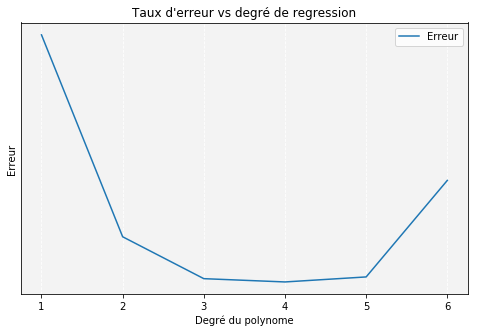

In [16]:
xtrain = xtrain_source.copy()
xtest = xtest_source.copy()
ytrain = ytrain_source.copy()
ytest = ytest_source.copy()

errors_per_degree = []
degrees = range(1,7)
for degree in degrees:
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                      ('linear', linear_model.LinearRegression(fit_intercept=False))])
    errors_per_degree.append(100*(1 - model.fit(xtrain, ytrain).score(xtest, ytest)))

fig = plt.figure(figsize=(8,5))
ax = plt.axes(facecolor='#f3f3f3')

plt.grid(color='w', linestyle='dashed')
plt.plot(degrees, errors_per_degree, label='Erreur')

plt.title("Taux d'erreur vs degré de regression")
plt.legend(loc='best')

ax.set(xlabel='Degré du polynome', ylabel='Erreur')
ax = ax.set_yscale('log')
plt.show()

## Optimisation du modèle
On observe les résultats obtenus en fonction du degré du polynôme

In [17]:
pd.DataFrame(data={'degree': degrees, 'error_rate': errors_per_degree})

,degree,error_rate
0,1,17.387143
1,2,11.699616
2,3,10.776439
3,4,10.707281
4,5,10.813130
5,6,13.067831


In [18]:
import operator
min_index, min_value = min(enumerate(errors_per_degree), key=operator.itemgetter(1))

error['Polynomial Regression degree %d w/ 2 features' % (min_index+1)] = min_value / 100
print('Erreur: %f' % error['Polynomial Regression degree %d w/ 2 features' % (min_index+1)])

Erreur: 0.107073


C'est le meilleur résultat obtenu pour l'instant

# Amélioration 3 : Régression k-NN
On utilise toujours les deux features. On essaie d'utiliser le modèle k-nearest-neighbors dans sa version "regression". Le nombre de voisins utilisé pour le k-NN est un hyperparamètre.

## Variation du modèle
On fait varier k pour optimiser le modèle

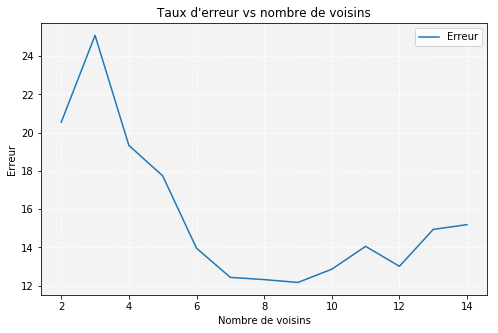

In [19]:
from sklearn.neighbors import KNeighborsRegressor

xtrain = xtrain_source.copy()
xtest = xtest_source.copy()
ytrain = ytrain_source.copy()
ytest = ytest_source.copy()

errors_per_neighbor_number = []
hyper_params = range(2,15)
for k in hyper_params:
    knn = KNeighborsRegressor(k)
    errors_per_neighbor_number.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))

fig = plt.figure(figsize=(8,5))
ax = plt.axes(facecolor='#f3f3f3')

plt.grid(color='w', linestyle='dashed')
plt.plot(hyper_params, errors_per_neighbor_number, label='Erreur')

plt.title("Taux d'erreur vs nombre de voisins")
plt.legend(loc='best')

ax.set(xlabel='Nombre de voisins', ylabel='Erreur')
ax = ax.set_yscale('linear')
plt.show()

## Optimisation du modèle
On observe les résultats obtenus en fonction du nombre de voisins

In [20]:
pd.DataFrame(data={'neighbors': hyper_params, 'error_rate': errors_per_neighbor_number})

,error_rate,neighbors
0,20.542735,2
1,25.081720,3
2,19.331147,4
3,17.739547,5
4,13.957660,6
5,12.435112,7
6,12.318989,8
7,12.170072,9
8,12.861461,10
9,14.056296,11


In [21]:
import operator
min_index, min_value = min(enumerate(errors_per_neighbor_number), key=operator.itemgetter(1))

error['k-NN regressor (k=%d) w/ 2 features' % (min_index+2)] = min_value / 100
print('Erreur: %f' % error['k-NN regressor (k=%d) w/ 2 features' % (min_index+2)])

Erreur: 0.121701


Le résultat est assez proche de la régression polynomiale

# Conclusion

Voici les taux d'erreur obtenus pour chaque méthode

In [22]:
s = pd.Series(error, name='Error')
s.index.name = 'Model'
s.reset_index()

,Model,Error
0,Linear Regression w/ 1 feature,0.180109
1,Linear Regression w/ 2 features,0.173871
2,Polynomial Regression degree 2 w/ 2 features,0.116996
3,Polynomial Regression degree 4 w/ 2 features,0.107073
4,k-NN regressor (k=9) w/ 2 features,0.121701


Compte tenu des résultats, je choisis la régression polynomiale avec 2 features.

## Améliorations possibles
* Supprimer les données aberrantes (outliers)
* Réaliser une régression linéaire par arrondissement